# 01 Titanic

In [78]:
# data - https://www.kaggle.com/competitions/titanic/data?select=train.csv
import numpy as np
import matplotlib.pyplot as plt

column_names = open('./data/titanic/train.csv').readline().strip().split(',')
column_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [79]:
def read_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1, converters={5 : lambda x : 0 if x == 'female' else 1})
    return data
train_data = read_data('./data/titanic/train.csv')
train_data[0]

(1., 0., 3., nan, nan, 1, 22., 1., 0., nan, 7.25, nan, nan)

# EDA & Data Preprocessing

In [80]:
import pandas as pd
train_df = pd.read_csv('./data/titanic/train.csv')
test_df = pd.read_csv('./data/titanic/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(29.69911764705882, 28.0, 24.0, 14.526497332334042)

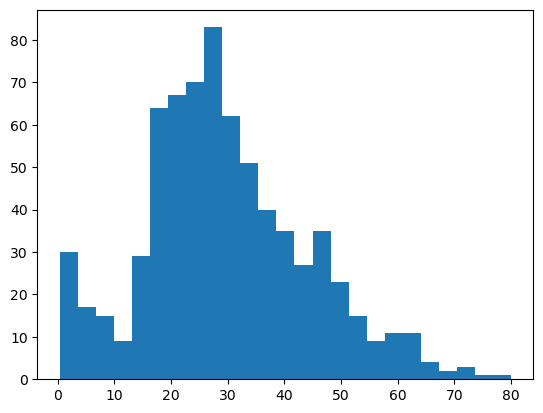

In [83]:
train_df['Age'].mean() , train_df['Age'].median() , train_df['Age'].mode()[0], train_df['Age'].std()
_ = plt.hist(train_df['Age'].dropna(), bins=25)

In [84]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] =  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
train_df[['Ticket','Fare','Cabin']].head(15)

,Ticket,Fare,Cabin
0,A/5 21171,7.2500,NaN
1,PC 17599,71.2833,C85
2,STON/O2. 3101282,7.9250,NaN
3,113803,53.1000,C123
4,373450,8.0500,NaN
5,330877,8.4583,NaN
6,17463,51.8625,E46
7,349909,21.0750,NaN
8,347742,11.1333,NaN
9,237736,30.0708,NaN


In [86]:
train_df = train_df.drop(['Name','Ticket','Cabin'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [87]:
train_df['Sex'] = train_df['Sex'].map(lambda x: 1 if x == 'female' else 0)
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [89]:
train_df['Embarked'].unique()
train_df['Embarked'] = train_df['Embarked'].map(lambda x: 0 if x == 'S' else 1 if x == 'C' else 2)
train_df.head()
train_df.describe()

array(['S', 'C', 'Q'], dtype=object)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


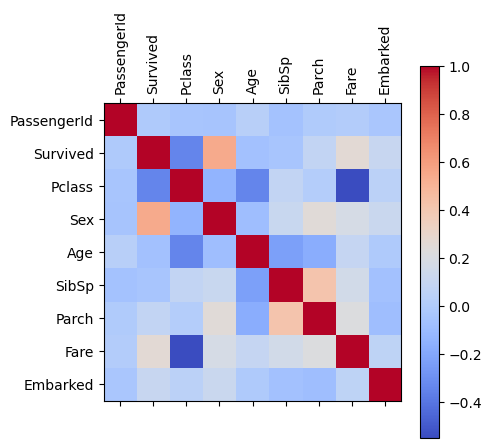

In [90]:
train_df.corr()
_ = plt.matshow(train_df.corr(), cmap = 'coolwarm', fignum = 1)
_ = plt.colorbar()
_ = plt.xticks(range(len(train_df.columns)), train_df.columns, rotation=90)
_ = plt.yticks(range(len(train_df.columns)), train_df.columns)
_ = plt.show()


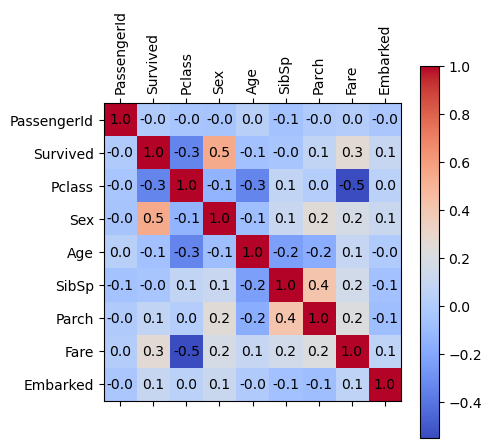

In [ ]:
_ = plt.matshow(train_df.corr(), cmap = 'coolwarm', fignum = 1)
_ = plt.colorbar()
_ = plt.xticks(range(len(train_df.columns)), train_df.columns, rotation=90)
_ = plt.yticks(range(len(train_df.columns)), train_df.columns)
for (i, j), val in np.ndenumerate(train_df.corr()):
    _ = plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='black')
_ = plt.show()

### EDA findings :
#### Correlation 
1. 'PClass' & 'Fare' -> -ve
2. 'Survived'& 'Sex'  -> +ve 
3. 'Survived'& 'Parch'  -> +ve 
4. 'Survived'& 'Fare'  -> +ve
5. 'Survived'& 'Embarked'  -> +ve

In [ ]:
train_df = pd.read_csv('./data/titanic/train.csv')
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Pipeline

In [252]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class MissingImputer(BaseEstimator , TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='median')
        X['Age'] = imputer.fit_transform(X[['Age']])
        X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
        imputer_fare = SimpleImputer(strategy='median')
        X['Fare'] = imputer_fare.fit_transform(X[['Fare']])
        
        return X

class OneHotEncode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']])
        matrix = matrix.toarray()
        column_names = ['Embarked_' + str(i) for i in range(matrix.shape[1])]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ['Sex_' + str(i) for i in range(matrix.shape[1])]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

# class Standardize(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         scaler = StandardScaler()
#         X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
#         return X

class dropFeats(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop([ 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex','PassengerId'], axis = 1 , errors = 'ignore')
    
class StandardizeAll(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        return X

pipline = Pipeline([
    ('Missingimputer', MissingImputer()),
    ('onehotencode', OneHotEncode()),
    # ('standardize', Standardize()),
    ('dropfeats', dropFeats()),
    ('standardize', StandardizeAll()),
])


In [179]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2)

In [180]:
X_train_set = pipline.fit_transform(X_train)
y_train_set = y_train.values
X_valid_set = pipline.fit_transform(X_valid)
y_valid_set = y_valid.values
X_train_set.shape, y_train_set.shape, X_valid_set.shape, y_valid_set.shape

((712, 10), (712,), (179, 10), (179,))

Classifier 
$$
h (X):\mathbb{R}^{10} \rightarrow \mathbb{R}
$$

In [181]:
Models = {}

## 1.Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression()
log_reg.fit(X_train_set, y_train_set)
y_pred_lr = log_reg.predict(X_valid_set)

print('Logistic Regression:')
print(classification_report(y_valid_set, y_pred_lr))
roc_acc = roc_auc_score(y_valid_set, log_reg.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc)
Models['LogisticRegression'] = roc_acc

LogisticRegression()

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       106
           1       0.77      0.73      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC: 0.8540966658051176


## 2. Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_set, y_train_set)
y_pred_dt = dt_clf.predict(X_valid_set)

# Evaluation
print("Decision Tree:")
print(classification_report(y_valid_set, y_pred_dt))
roc_acc = roc_auc_score(y_valid_set, dt_clf.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc)
Models['DecisionTree'] = roc_acc

DecisionTreeClassifier(random_state=42)

Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       106
           1       0.69      0.70      0.69        73

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

ROC-AUC: 0.7394029464978031


## 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_set, y_train_set)
y_pred_rf = rf_clf.predict(X_valid_set)

# Evaluation
print("Random Forest:")
print(classification_report(y_valid_set, y_pred_rf))
roc_acc = roc_auc_score(y_valid_set, rf_clf.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc)
Models['RandomForest'] = roc_acc

RandomForestClassifier(random_state=42)

Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       106
           1       0.70      0.70      0.70        73

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179

ROC-AUC: 0.8319979322822434


## 4. XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_set, y_train_set)
y_pred_xgb = xgb_clf.predict(X_valid_set)

# Evaluation
print("XGBoost:")
print(classification_report(y_valid_set, y_pred_xgb))
roc_acc = roc_auc_score(y_valid_set, xgb_clf.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc)
Models['XGBoost'] = roc_acc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost:
              precision    recall  f1-score   support

           0       0.60      0.95      0.74       106
           1       0.58      0.10      0.16        73

    accuracy                           0.60       179
   macro avg       0.59      0.52      0.45       179
weighted avg       0.60      0.60      0.51       179

ROC-AUC: 0.6086844145774102


## 5. SVM

In [ ]:

from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_set, y_train_set)
y_pred_svm = svm_clf.predict(X_valid_set)

# Evaluation
print("SVM:")
print(classification_report(y_valid_set, y_pred_svm))
roc_acc = roc_auc_score(y_valid_set, svm_clf.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc )
Models['SVM'] = roc_acc


SVC(probability=True, random_state=42)

SVM:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       106
           1       0.74      0.71      0.73        73

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

ROC-AUC: 0.8204962522615663


## 6. K-NN

In [187]:

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_set, y_train_set)
y_pred_knn = knn_clf.predict(X_valid_set)

# Evaluation
print("k-Nearest Neighbors:")
print(classification_report(y_valid_set, y_pred_knn))
roc_acc = roc_auc_score(y_valid_set, knn_clf.predict_proba(X_valid_set)[:, 1])
print("ROC-AUC:", roc_acc)
Models['KNN'] = roc_acc

KNeighborsClassifier()

k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       106
           1       0.70      0.70      0.70        73

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179

ROC-AUC: 0.836133367795296


## Neural Networks

NN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class TitanicNN(nn.Module):
    def __init__(self):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(10, 32)  # Input: 10 features, Hidden: 32 units
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)  # Output: 1 (binary classification)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Model, Loss, Optimizer
model = TitanicNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train_set, dtype=torch.float32))
    loss = criterion(outputs.squeeze(), torch.tensor(y_train_set, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Evaluate
model.eval()
with torch.no_grad():
    y_pred_nn = model(torch.tensor(X_valid_set, dtype=torch.float32)).squeeze()
    y_pred_nn = (y_pred_nn > 0.5).numpy()
    print(classification_report(y_valid_set, y_pred_nn))

In [192]:
for Models in sorted(Models.items(), key=lambda x: x[1], reverse=True):
    print(Models)

('LogisticRegression', 0.8540966658051176)
('KNN', 0.836133367795296)
('RandomForest', 0.8319979322822434)
('SVM', 0.8204962522615663)
('DecisionTree', 0.7394029464978031)
('XGBoost', 0.6086844145774102)


### Select top 3

In [225]:
# running logistic regression on multiple times
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg_accs = []
for i in range(10):
    X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2)
    X_train_set = pipline.fit_transform(X_train)
    y_train_set = y_train.values
    X_valid_set = pipline.fit_transform(X_valid)
    y_valid_set = y_valid.values
    log_reg = LogisticRegression()
    log_reg.fit(X_train_set, y_train_set)
    y_pred_lr = log_reg.predict(X_valid_set)

    # print('Logistic Regression:')
    # print(classification_report(y_valid_set, y_pred_lr))
    roc_acc = roc_auc_score(y_valid_set, log_reg.predict_proba(X_valid_set)[:, 1])
    print("ROC-AUC:", roc_acc)
    log_reg_accs.append(roc_acc)

print("Mean ROC-AUC:", np.mean(log_reg_accs))

LogisticRegression()

ROC-AUC: 0.8696153846153847


LogisticRegression()

ROC-AUC: 0.8371243451888614


LogisticRegression()

ROC-AUC: 0.8456020380799142


LogisticRegression()

ROC-AUC: 0.844532279314888


LogisticRegression()

ROC-AUC: 0.8493640699523053


LogisticRegression()

ROC-AUC: 0.845886075949367


LogisticRegression()

ROC-AUC: 0.8046113306982872


LogisticRegression()

ROC-AUC: 0.8644268774703557


LogisticRegression()

ROC-AUC: 0.827391874180865


LogisticRegression()

ROC-AUC: 0.8316300459887583
Mean ROC-AUC: 0.8420184321438986


In [226]:
# running KNN multiple times
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

accs_neigh = []
for i in range(10):
    for neighbors in range(3, 10):
        X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2)
        X_train_set = pipline.fit_transform(X_train)
        y_train_set = y_train.values
        X_valid_set = pipline.fit_transform(X_valid)
        y_valid_set = y_valid.values
        
        knn_clf = KNeighborsClassifier(n_neighbors=neighbors)
        knn_clf.fit(X_train_set, y_train_set)
        y_pred_knn = knn_clf.predict(X_valid_set)
        
        roc_acc = roc_auc_score(y_valid_set, log_reg.predict_proba(X_valid_set)[:, 1])
        print("ROC-AUC:", roc_acc)
        accs_neigh.append((neighbors, roc_acc))

# print("Mean ROC-AUC:", np.mean(accs_neigh))

KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8680703624733475


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8296460176991151


KNeighborsClassifier()

ROC-AUC: 0.8891891891891892


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8891645988420182


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8146788990825687


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.89792008757526


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.9065433091981765


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8636422136422136


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8187181550013409


KNeighborsClassifier()

ROC-AUC: 0.8774774774774774


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8887407971566388


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8177361853832442


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8606159895150721


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8430379746835444


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8170376258611552


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8621848739495798


KNeighborsClassifier()

ROC-AUC: 0.8574898785425101


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.874089068825911


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8266666666666667


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.854149434794596


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8678160919540229


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.9011795543905636


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8095238095238095


KNeighborsClassifier()

ROC-AUC: 0.8526867627785059


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8500938589434165


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8394864588656106


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8819838056680164


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8125823451910409


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8785058977719528


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8503931847968546


KNeighborsClassifier()

ROC-AUC: 0.884031198686371


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8575298694081688


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8664642375168691


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8439321674615792


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8396926338102808


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.9092249932957897


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8577158135981666


KNeighborsClassifier()

ROC-AUC: 0.8501589825119237


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8253968253968255


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8483016304347826


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8468519928915968


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8961389961389962


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.9038800705467371


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8239226375908619


KNeighborsClassifier()

ROC-AUC: 0.8728139904610493


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8694019844462322


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.83648056923919


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8314122946475888


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8264478764478764


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8534527518172378


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8468431210366694


KNeighborsClassifier()

ROC-AUC: 0.8830698287220027


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8820650675489385


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8952091767881243


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8411088136469372


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.880171277997365


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.855259671436142


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8720487433358721


KNeighborsClassifier()

ROC-AUC: 0.8822205551387847


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8255735492577598


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8422841151385927


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.867948717948718


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.9073083778966132


KNeighborsClassifier(n_neighbors=3)

ROC-AUC: 0.8257154213036565


KNeighborsClassifier(n_neighbors=4)

ROC-AUC: 0.8398664343786295


KNeighborsClassifier()

ROC-AUC: 0.8403532608695652


KNeighborsClassifier(n_neighbors=6)

ROC-AUC: 0.8015625


KNeighborsClassifier(n_neighbors=7)

ROC-AUC: 0.8022941970310392


KNeighborsClassifier(n_neighbors=8)

ROC-AUC: 0.8729645903334194


KNeighborsClassifier(n_neighbors=9)

ROC-AUC: 0.8565452091767881


In [227]:
# running KNN multiple times
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score

rforest_accs = []
for i in range(10):
    for neighbors in range(3, 10):
        X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2)
        X_train_set = pipline.fit_transform(X_train)
        y_train_set = y_train.values
        X_valid_set = pipline.fit_transform(X_valid)
        y_valid_set = y_valid.values
        
        rf_clf = RandomForestClassifier(random_state=42, n_estimators=100*neighbors)
        rf_clf.fit(X_train_set, y_train_set)
        y_pred_rf = rf_clf.predict(X_valid_set)
        
        roc_acc = roc_auc_score(y_valid_set, rf_clf.predict_proba(X_valid_set)[:, 1])
        print("ROC-AUC:", roc_acc)
        rforest_accs.append((neighbors*100, roc_acc))

print("Mean ROC-AUC:", np.mean(rforest_accs))

RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8551769331585847


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8422665623369848


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8340859332238642


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8526119402985075


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.7985913672783664


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8671319102353585


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.88582995951417


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.7659895150720837


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8516755521706018


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8150319829424307


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8471166448230668


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8306236673773987


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8038553259141495


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.7931011997913406


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8307569296375266


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.7905925925925925


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8527452025586354


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.7357344632768361


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8766607051609605


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8703920041536863


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.7450980392156863


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8540778251599148


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8822070260123358


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8195270095631946


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8774044795783926


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8742175273865415


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8311567164179104


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8025032938076416


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8432744565217392


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8449131513647643


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8887191240132416


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8089299560609977


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8472962680883472


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.7693017127799736


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8043206446235065


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8390013495276654


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.7813090418353575


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8144268774703557


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.7708333333333334


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8771646420263634


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.870242914979757


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8063824081523198


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8401923076923077


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8691772151898733


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8027516953573294


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8235524256651017


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8803834398444013


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8491902834008097


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8531073446327684


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8620208174663622


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8724827768945416


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8538113006396588


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8524904214559387


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8381079704609117


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8080368906455863


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.7529488859764087


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8121607650555699


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8846714361420243


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.8664642375168692


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.7719216417910449


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.8485851505711319


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8247519442209708


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8556628056628057


RandomForestClassifier(n_estimators=300, random_state=42)

ROC-AUC: 0.8856937923839332


RandomForestClassifier(n_estimators=400, random_state=42)

ROC-AUC: 0.8591269841269842


RandomForestClassifier(n_estimators=500, random_state=42)

ROC-AUC: 0.835836627140975


RandomForestClassifier(n_estimators=600, random_state=42)

ROC-AUC: 0.8524527337761879


RandomForestClassifier(n_estimators=700, random_state=42)

ROC-AUC: 0.837221494102228


RandomForestClassifier(n_estimators=800, random_state=42)

ROC-AUC: 0.8819102353585112


RandomForestClassifier(n_estimators=900, random_state=42)

ROC-AUC: 0.8446910695742473
Mean ROC-AUC: 300.4176548777299


In [228]:
accs_knn = pd.DataFrame(accs_neigh)
accs_knn = accs_knn.groupby(0).mean()
accs_knn = accs_knn.sort_values(1 , ascending=False)
accs_knn

,1
0,
5,0.868949
3,0.867597
9,0.863628
8,0.859889
6,0.856362
4,0.841086
7,0.838960


In [229]:

accs_RF = pd.DataFrame(rforest_accs)
accs_RF = accs_RF.groupby(0).mean()
accs_RF = accs_RF.sort_values(1 , ascending=False)
accs_RF

,1
0,
700,0.850885
400,0.847842
300,0.838834
500,0.838340
800,0.837597
600,0.819305
900,0.814365


In [230]:

print("Mean ROC-AUC:", np.mean(log_reg_accs))
print('Mean ROC-ACC:' , accs_knn.iloc[0].values[0])
print("Mean ROC-AUC:", accs_RF.iloc[0].values[0])


Mean ROC-AUC: 0.8420184321438986
Mean ROC-ACC: 0.868949112437738
Mean ROC-AUC: 0.8508852232296651


Best = KNN on n= 5

In [233]:
# running KNN multiple times
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

neighbors =5 

Train = pd.read_csv('./data/titanic/train.csv')
Test  = pd.read_csv('./data/titanic/test.csv')
Train.head()
Test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [234]:
Train.describe()
Test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [254]:

X_train = Train.drop('Survived', axis=1)
y_train = Train['Survived']
X_test = Test

X_train_set = pipline.fit_transform(X_train)
y_train_set = y_train.values
X_test_set = pipline.fit_transform(X_test)
# y_test_set = y_test.values
result_df = pd.DataFrame(Test['PassengerId'] , columns=['PassengerId'])
result_df.shape

(418, 1)

In [256]:
knn_clf = KNeighborsClassifier(n_neighbors=neighbors)
knn_clf.fit(X_train_set, y_train_set)
y_pred_knn = knn_clf.predict(X_test_set)
y_pred_knn.shape

In [262]:
result_df['Survived'] = y_pred_knn
result_df.to_csv('./submissions/myalla_titanic_submission_01_knn.csv', index=False)
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [263]:
log_reg = LogisticRegression()
log_reg.fit(X_train_set, y_train_set)
y_pred_lr = log_reg.predict(X_test_set)
result_df = pd.DataFrame(Test['PassengerId'] , columns=['PassengerId'])
result_df['Survived'] = y_pred_lr
result_df.to_csv('./submissions/myalla_titanic_submission_02_logReg.csv', index=False)
result_df

LogisticRegression()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [264]:
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(X_train_set, y_train_set)
y_pred_rf = rf_clf.predict(X_test_set)

result_df = pd.DataFrame(Test['PassengerId'] , columns=['PassengerId'])
result_df['Survived'] = y_pred_lr
result_df.to_csv('./submissions/myalla_titanic_submission_03_RForest.csv', index=False)
result_df

RandomForestClassifier(n_estimators=300)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [265]:
combined_df = pd.DataFrame(Test['PassengerId'] , columns=['PassengerId'])
combined_df['Knn'] = y_pred_knn
combined_df['LogReg'] = y_pred_lr
combined_df['RandForest'] = y_pred_rf

In [ ]:
combined_df['Survived'] = combined_df[['Knn', 'LogReg', 'RandForest']].mode(axis=1)
combined_df.aggregate(['sum','mean', 'std', 'min', 'max'])

,PassengerId,Knn,LogReg,RandForest,Survived
sum,460009.000000,182.000000,150.000000,142.000000,159.000000
mean,1100.500000,0.435407,0.358852,0.339713,0.380383
std,120.810458,0.496404,0.480238,0.474179,0.486063
min,892.000000,0.000000,0.000000,0.000000,0.000000
max,1309.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
combined_df.drop(['Knn', 'LogReg', 'RandForest'], axis=1, inplace=True)
combined_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [270]:
combined_df.to_csv('./submissions/myalla_titanic_submission_04_combined.csv', index=False)